<a href="https://colab.research.google.com/github/bijili-parasa/projects-/blob/main/amazon_review_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset = 'https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews'


In [ ]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuradhabhanu
Your Kaggle Key: ··········


100%|██████████| 1.29G/1.29G [00:13<00:00, 101MB/s]


In [ ]:
data_dir= './amazon-reviews'

In [ ]:
import os

In [ ]:
os.listdir(data_dir)

['train.csv', 'test.csv', 'amazon_review_polarity_csv.tgz']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as WordCloud
from termcolor import colored
from collections import Counter
import re
import nltk



In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.1 MB/s eta 0:00:00


In [ ]:
import contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words= set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer,SnowballStemmer
stemmer = SnowballStemmer('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')





In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/amazon-reviews/train.csv", header = None)

In [ ]:
df.columns=["Rating","Title","Text"]

ValueError: ignored

In [ ]:
df.head()

,Rating,Title,Text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


Rating=0, Titel =1 ,Review=2

In [ ]:
df.columns = ['0','1','2']

In [ ]:
df.head(10)

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
5,2,an absolute masterpiece,I am quite sure any of you actually taking the...
6,1,Buyer beware,"This is a self-published book, and if you want..."
7,2,Glorious story,I loved Whisper of the wicked saints. The stor...
8,2,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...
9,2,Whispers of the Wicked Saints,This was a easy to read book that made me want...


In [ ]:
df.shape

(3599999, 3)

In [ ]:
def random_sample(data):
  return data.sample(frac = 0.025)

In [ ]:
df =  random_sample(df)

In [ ]:
df.shape

(90000, 3)

In [ ]:
df = df[['Rating','Text']].reset_index(drop=True)

In [ ]:
df.head()

,Rating,Text
0,1,This is the stereotypical piece of literature ...
1,2,The Amazon review missed the point of this rec...
2,1,Boring depressive black metal(?) whatever.. Bo...
3,1,"Brought this DVD ""New"" when I put it in my ""ne..."
4,2,If you have ever enjoyed Drum and Bugle Corps ...


In [ ]:
def decrease_label_by_one(label):
  return label -1

In [ ]:
df['Rating'] = df['Rating'].apply(decrease_label_by_one)


In [ ]:
df.head()

,Rating,Text
0,0,This is the stereotypical piece of literature ...
1,1,The Amazon review missed the point of this rec...
2,0,Boring depressive black metal(?) whatever.. Bo...
3,0,"Brought this DVD ""New"" when I put it in my ""ne..."
4,1,If you have ever enjoyed Drum and Bugle Corps ...


In [ ]:
df['Text'].value_counts(normalize=True)

We all truly enjoyed this movie! The picture quality was beautiful and I know I will watch it again! Awesome!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     0.000022
Purchased as a gift for our friends' daughter. She loves the puzzles. She is 3 1/2 yo. Pieces are nice size for small hands. 

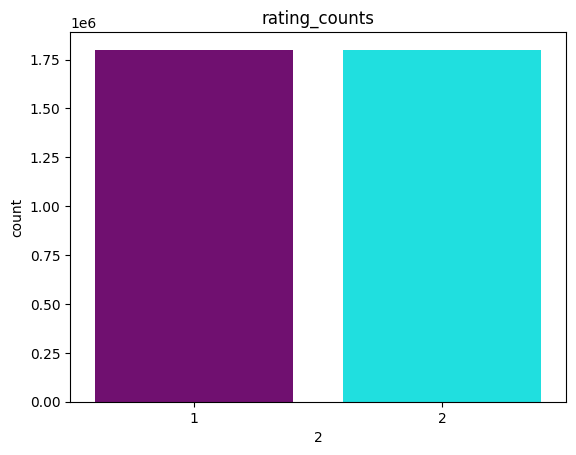

In [ ]:
color_palette = ['purple','cyan']
sns.set_palette(color_palette)
sns.countplot(x=df['2'])

plt.title("rating_counts")
plt.show()


In [ ]:
df.isnull().sum()

Rating    0
Text      0
dtype: int64

In [ ]:
def preprocess_text(text):
  text=re.sub(r'[\W_]+', ' ',contractions.fix(re.sub(r'\d+','',text.replace(' s ',' ')))).lower()
  tokens = nltk.word_tokenize(text)
  text = " ".join([token for token in tokens if token not in stop_words])
  normalized_text = [stemmer.stem(word) for word in text.split()]
  text = " ".join(normalized_text)
  return text


In [ ]:
def preprocess_text(text):
    # Text clean
    text = re.sub(r'[\W_]+', ' ', contractions.fix(re.sub(r'\d+', '', text.replace(' s ', ' ')))).lower()

    # Stopword removal
    tokens = nltk.word_tokenize(text)
    text = " ".join([token for token in tokens if token not in stop_words])

    # Data Normalization
    normalized_text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(normalized_text)

    return text

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
print(colored('Before of clean:\n', 'blue'), df.Text[8])
print(colored('After of clean:\n', 'blue'), preprocess_text(df.Text[8]))

Before of clean:
 This is just an inexpensive plastic jug, with stainless steel casing on the upper portion. The stainless steel is really only aesthetic. In fact, high quality plastic would be more structurally supportive and protective. Valve is difficult to press in for adults, and especially for children. Not really worth the price.
After of clean:
 inexpens plastic jug stainless steel case upper portion stainless steel realli aesthet fact high qualiti plastic would structur support protect valv difficult press adult especi children realli worth price


In [ ]:
## Cleaning and processing on the Review variable
df['Text'] = df['Text'].apply(preprocess_text)

In [ ]:
df.head(10)

,Rating,Text
0,0,stereotyp piec literatur someon say like think...
1,1,amazon review miss point record taken back lit...
2,0,bore depress black metal whatev borrow heavili...
3,0,brought dvd new put new dvd player skip work w...
4,1,ever enjoy drum bugl corp music perform never ...
5,0,usual pretti trust see amazon com seller habit...
6,0,realli care one use wipe month week back log t...
7,0,ok girl sound like chipmunk serious even frien...
8,0,inexpens plastic jug stainless steel case uppe...
9,0,extrem disappoint mirror starter arm short abl...


In [ ]:
words = Counter(' '.join(df['Text'].to_list()).split())
Frequency_words = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words = Frequency_words.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words['Rank'] = Frequency_words['Rank'].apply(lambda x : x+1)
Frequency_words.head(20)

,Rank,Words,Frequency
0,1,book,52393
1,2,one,34162
2,3,like,28247
3,4,would,25505
4,5,read,22523
5,6,use,21675
6,7,get,21513
7,8,good,21205
8,9,time,20483
9,10,great,20304


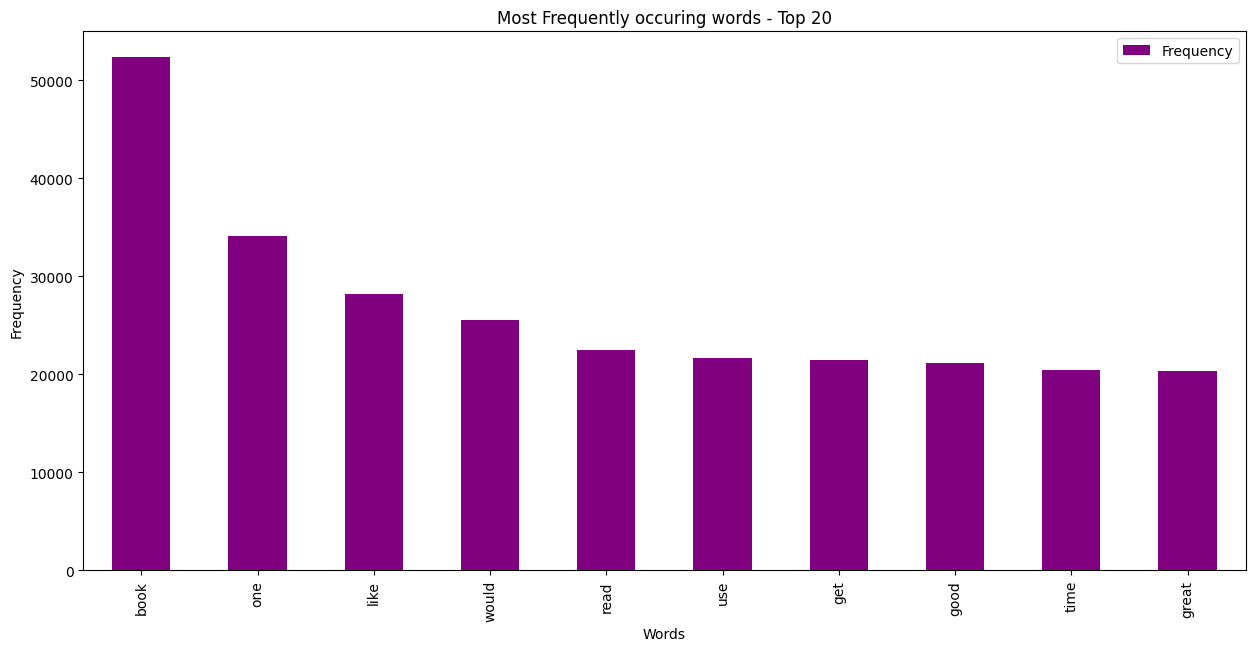

In [ ]:
Top10 = Frequency_words[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Most Frequently occuring words - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from wordcloud import WordCloud
#  WordCloud chart

def show_wordcloud(df, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(df))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

    show_wordcloud(df["Text"])

In [ ]:
Tf = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer ='char')
Tf

TfidfVectorizer(analyzer='char', max_features=20000, ngram_range=(1, 3))

In [ ]:
X = Tf.fit_transform(df['Text'])
y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
lr = LogisticRegression(max_iter=5000)

# Define the preprocessing steps for numeric features
lr.fit(X_train, y_train)

# Evaluate the model on the testing data
lr_preds = lr.predict(X_test)

# Evaluate the accuracy of the model
lr_accuracy = accuracy_score(y_test, lr_preds)*100
print(f"Accuracy of Linear Regression Model: {lr_accuracy:.2f}%")

Accuracy of Linear Regression Model: 81.91%


In [ ]:
svm = LinearSVC()

# Define the preprocessing steps for numeric features
svm.fit(X_train, y_train)

# Predict the ratings for the test set
svm_preds = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_preds)*100
print(f"Accuracy of SVM Model: {svm_accuracy:.2f}%")

Accuracy of SVM Model: 82.61%


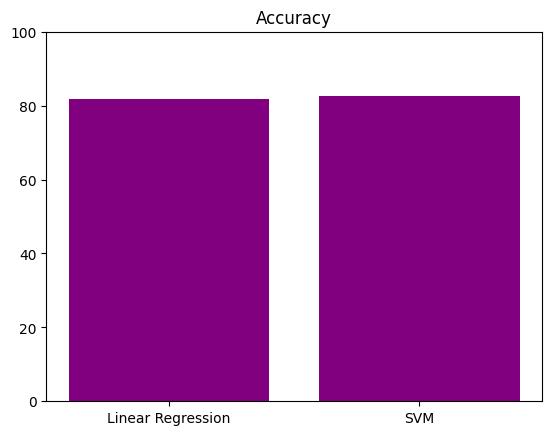

In [ ]:
models = ['Linear Regression', 'SVM']
accuracy = [lr_accuracy, svm_accuracy]
plt.bar(models, accuracy)
plt.title('Accuracy')
plt.ylim(0, 100)
plt.show()

In [ ]:
def plot_precision_recall_curve(y_true, y_scores, model_name):
    average_precision = average_precision_score(y_true, y_scores)
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall Curve')
    plt.fill_between(recall, precision, alpha=0.2, color='navy')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve of {model_name}: AP = {average_precision:.2f}')
    plt.legend(loc="lower left")
    plt.show()

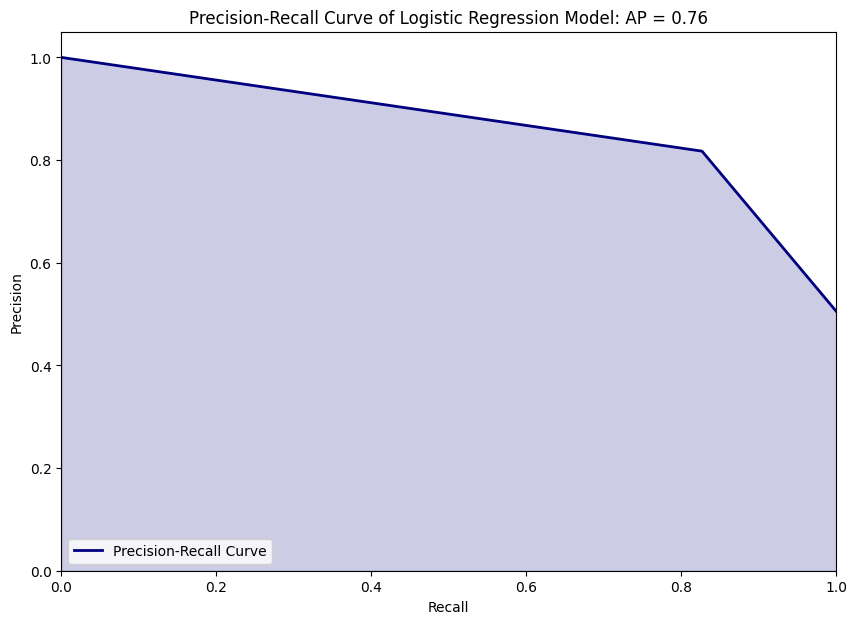

In [ ]:
## Precision-Recall Curve of LR model
plot_precision_recall_curve(y_test, lr_preds, 'Logistic Regression Model')

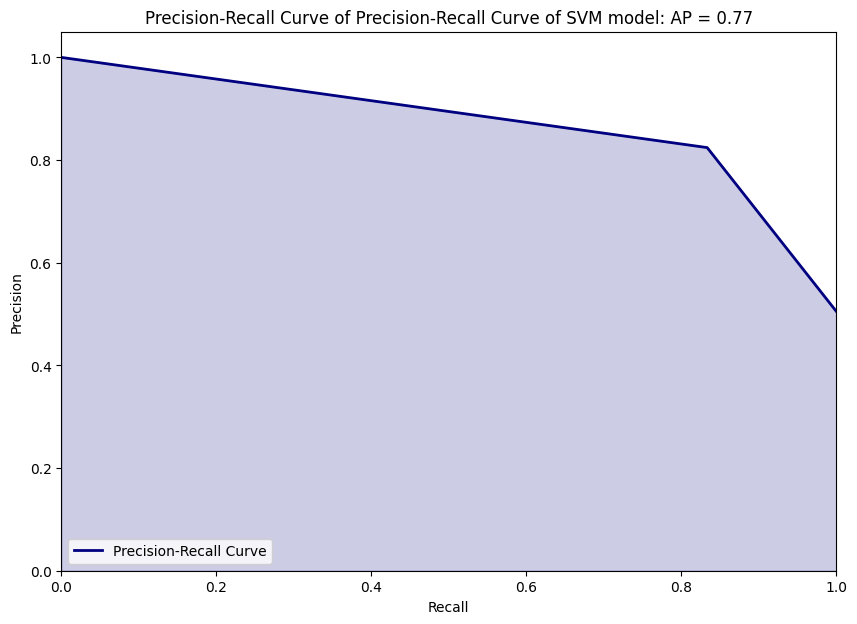

In [ ]:
plot_precision_recall_curve(y_test, svm_preds, 'Precision-Recall Curve of SVM model')

In [ ]:
## Classification report
print(classification_report(y_test,lr_preds))
print(classification_report(y_test,svm_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8905
           1       0.82      0.83      0.82      9095

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      8905
           1       0.82      0.83      0.83      9095

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



In [ ]:
def predict_sentiment(comment, vectorizer, model):
    vec = vectorizer.transform([comment])
    prediction = model.predict(vec)

    if prediction == 0:
        print(colored("Negative", "red"))
    else:
        print(colored("Positive", "blue"))

In [ ]:
x = "Lousy product. The quality is very low."
predict_sentiment(x, Tf, svm)

Positive


In [ ]:
x1 = "The quality is bad."
predict_sentiment(x1, Tf, lr)

Negative


In [ ]:
x2 = "The book is awesome."
predict_sentiment(x2, Tf, svm)

Positive
